## Setup

*Make sure to run this notebook using a GPU runtime (Runtime > Change runtime type > GPU).*

In this notebook, we demonstrate how to use our models to detect graphical representations of (latent) variables and path coefficients in a given PDF file. The outputs of our functions will be saved in two different folders ```cropped_imgs``` (for extracted conceptual model figures) and ```final_imgs``` (detections of variables and coefficients in the figures). Before we can start, we need to set a few things up. <br>
First, we have clone our GitHub Repo:

In [4]:
!git clone https://github.com/purplesweatshirt/icispaper

Cloning into 'icispaper'...
remote: Enumerating objects: 949, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 949 (delta 44), reused 3 (delta 1), pack-reused 859
Receiving objects: 100% (949/949), 12.67 MiB | 16.64 MiB/s, done.
Resolving deltas: 100% (366/366), done.


Next, we change the directory to our cloned repo:

In [5]:
%cd ./icispaper

/content/icispaper


We have to install two dependencies to convert each page of a PDF into an image file:

In [6]:
!apt-get install poppler-utils 
!pip install pdf2image

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


And have to run the "make" command to be able to use the YOLOv4 model:

In [ ]:
!make

We download our model's weights. Unfortunately, we couldn't upload them directly to GitHub due to their large sizes.

In [8]:
!wget --output-document=fig_det.weights https://sync.academiccloud.de/index.php/s/U13SnHdpPAnPKI0/download
!wget --output-document=var_det.weights https://sync.academiccloud.de/index.php/s/RBm4jpUvxzwQOAu/download
!wget --output-document=sem_class.h5 https://sync.academiccloud.de/index.php/s/excRqLnqE5xN4fM/download

--2021-05-04 14:50:15--  https://sync.academiccloud.de/index.php/s/U13SnHdpPAnPKI0/download
Resolving sync.academiccloud.de (sync.academiccloud.de)... 134.76.23.42
Connecting to sync.academiccloud.de (sync.academiccloud.de)|134.76.23.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256037520 (244M) [application/octet-stream]
Saving to: ‘fig_det.weights’

fig_det.weights     100%[===================>] 244.18M  4.96MB/s    in 88s     

2021-05-04 14:51:45 (2.77 MB/s) - ‘fig_det.weights’ saved [256037520/256037520]

--2021-05-04 14:51:45--  https://sync.academiccloud.de/index.php/s/RBm4jpUvxzwQOAu/download
Resolving sync.academiccloud.de (sync.academiccloud.de)... 134.76.23.42
Connecting to sync.academiccloud.de (sync.academiccloud.de)|134.76.23.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256059060 (244M) [application/octet-stream]
Saving to: ‘var_det.weights’

var_det.weights     100%[===================>] 244.20M  2.06MB/s    

Finally, we download a PDF file to demonstrate our pipeline:

In [9]:
!wget --output-document=test.pdf http://docshare01.docshare.tips/files/7052/70528799.pdf

--2021-05-04 14:53:37--  http://docshare01.docshare.tips/files/7052/70528799.pdf
Resolving docshare01.docshare.tips (docshare01.docshare.tips)... 172.67.161.227, 104.21.33.112, 2606:4700:3031::ac43:a1e3, ...
Connecting to docshare01.docshare.tips (docshare01.docshare.tips)|172.67.161.227|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 689422 (673K) [application/pdf]
Saving to: ‘test.pdf’

test.pdf            100%[===================>] 673.26K  3.86MB/s    in 0.2s    

2021-05-04 14:53:37 (3.86 MB/s) - ‘test.pdf’ saved [689422/689422]



## Inference

We created a python file which contains all of our wrapper functions. These functions will be used in the following, so we import them.

In [10]:
from detection_utils_new import *

We are converting all PDF pages into image files by using our function ```store_images```. These images will be stored in the ```temp_imgs``` folder. Then we run our ```classify_pages``` function which classifies each image (i.e., does it contain a graphical representation of a conceptual model or not) and keeps only the relevant pages in the ```temp_imgs``` folder.

In [11]:
# Enter the path to the pdf file
PATH_TO_PDF = 'test.pdf'

store_images(PATH_TO_PDF)
classify_pages(model_path='sem_class.h5')

./temp_imgs/Page2.jpg
./temp_imgs/Page4.jpg
./temp_imgs/Page22.jpg
./temp_imgs/Page6.jpg
./temp_imgs/Page26.jpg
./temp_imgs/Page12.jpg
./temp_imgs/Page5.jpg
./temp_imgs/Page20.jpg
./temp_imgs/Page7.jpg
./temp_imgs/Page14.jpg
./temp_imgs/Page13.jpg
./temp_imgs/Page9.jpg
./temp_imgs/Page18.jpg
./temp_imgs/Page1.jpg
./temp_imgs/Page23.jpg
./temp_imgs/Page3.jpg
./temp_imgs/Page21.jpg
./temp_imgs/Page25.jpg
./temp_imgs/Page24.jpg
./temp_imgs/Page10.jpg
./temp_imgs/Page27.jpg
./temp_imgs/Page16.jpg
./temp_imgs/Page11.jpg
./temp_imgs/Page19.jpg
./temp_imgs/Page15.jpg
./temp_imgs/Page8.jpg
./temp_imgs/Page17.jpg


We pass the name/path of our weights to the ```detect_figures``` function. This function detects the SEM figures in the image files from ```temp_imgs```. The images are cropped to the size of each detection. These cropped images are stored in the ```cropped_imgs``` folder and can be used by databases to provide images of the conceptual models of a paper.

Processing image Page13


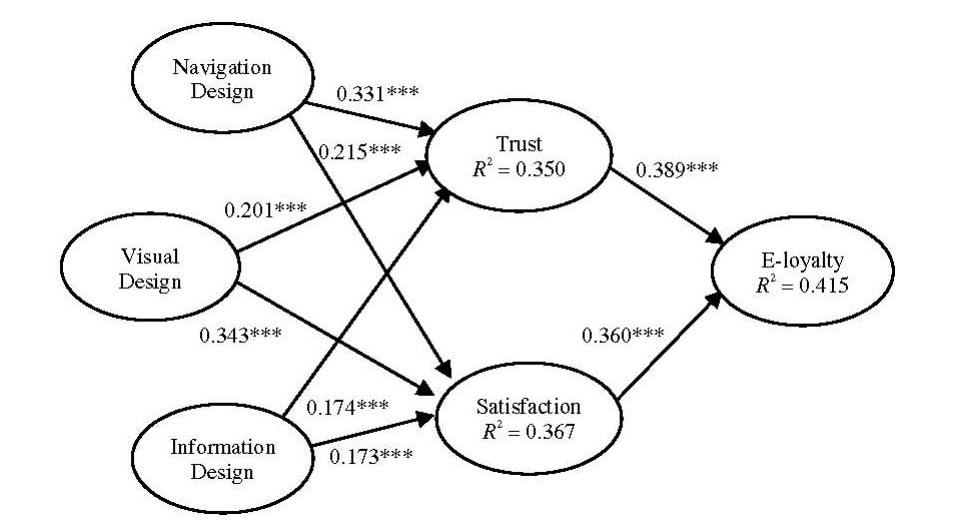

Processing image Page3


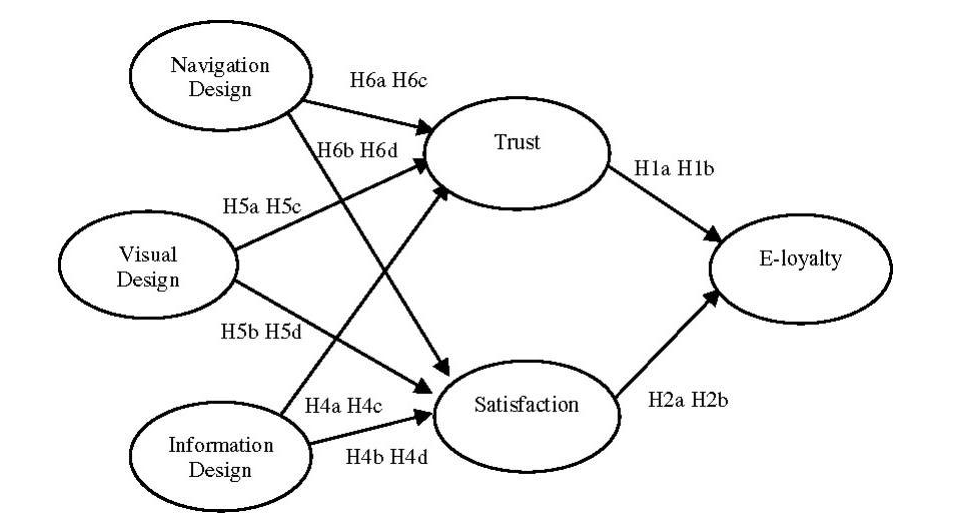

Processing image Page16


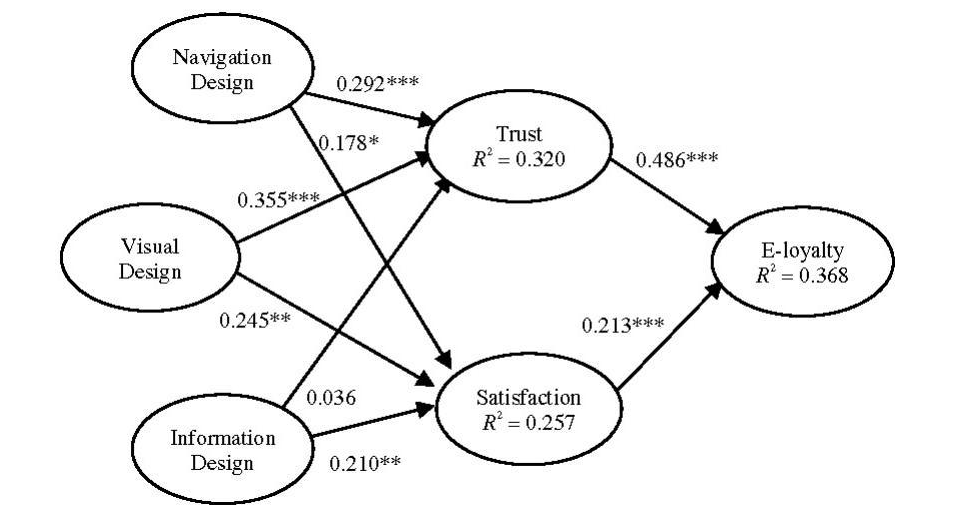

Processing image Page15


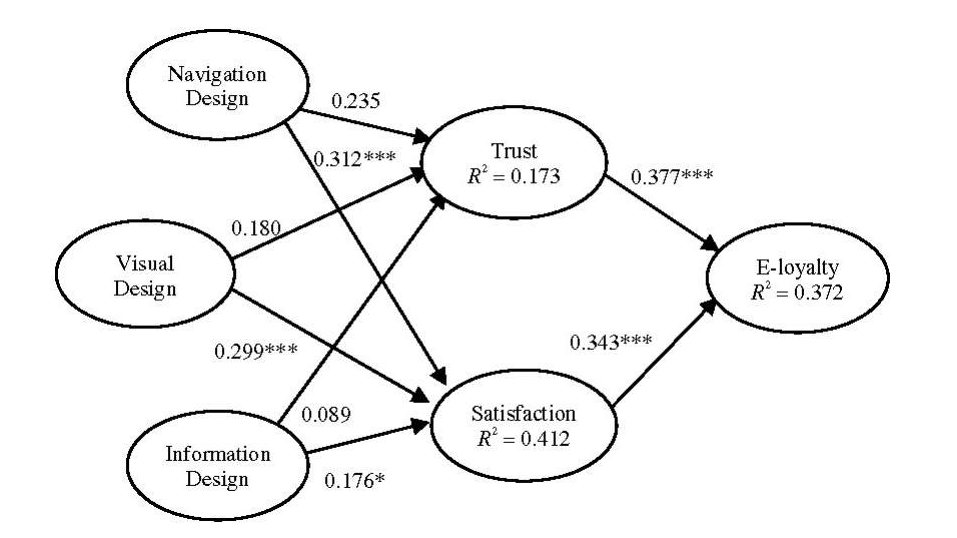

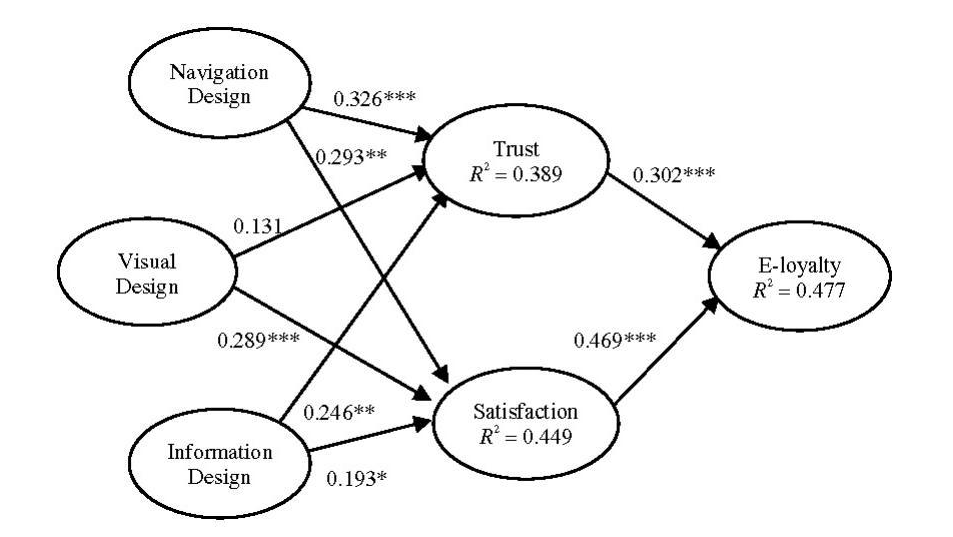

In [12]:
detect_figures(weights='fig_det.weights')

Our ```detect_variables``` functions uses the cropped images from the previous step to detect latent variables, items and path coefficients in the SEM figures. The resulting images are stored in the ```final_imgs``` folder. In the future, the bounding boxes will be used to extract the names via OCR and store this information in a database together with the intermediate images and the paper itself.

Processing image 1_Page15


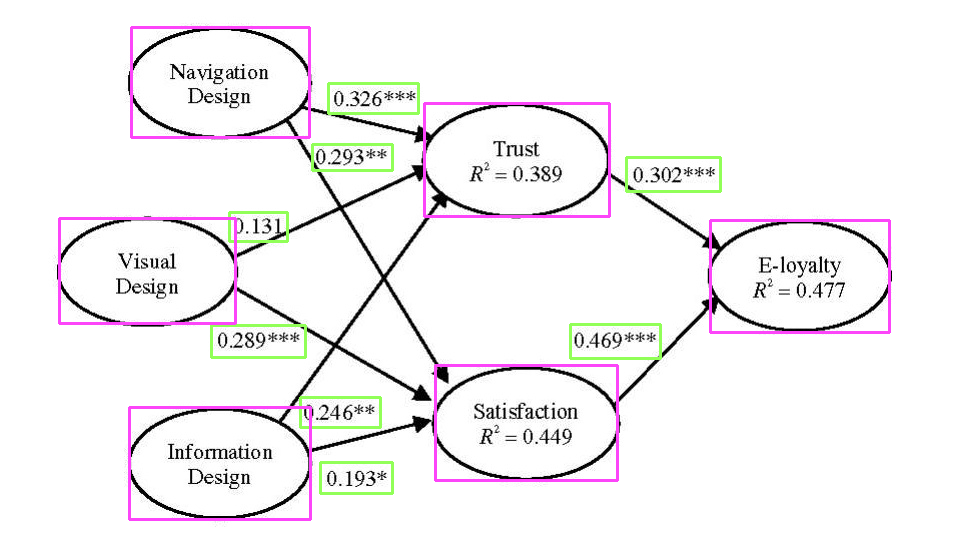

Processing image 0_Page15


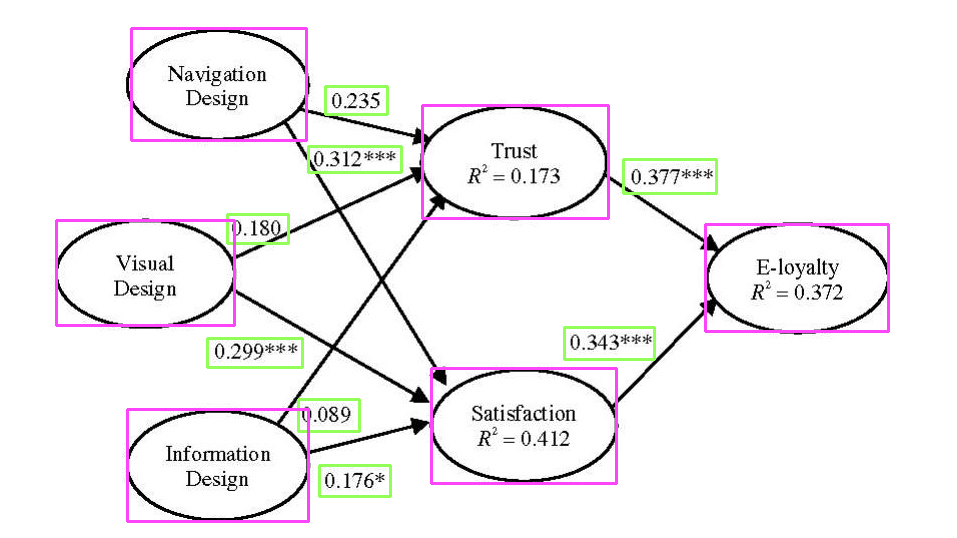

Processing image 0_Page16


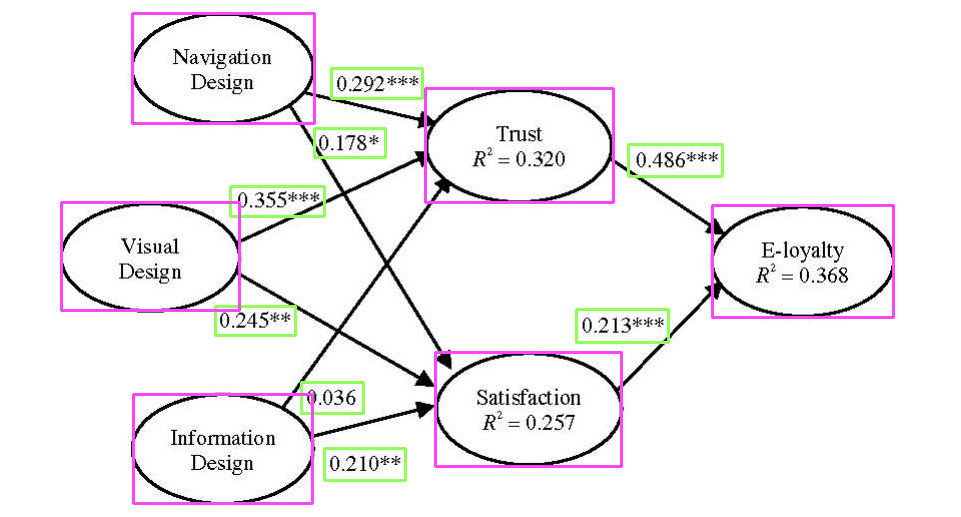

Processing image 0_Page3


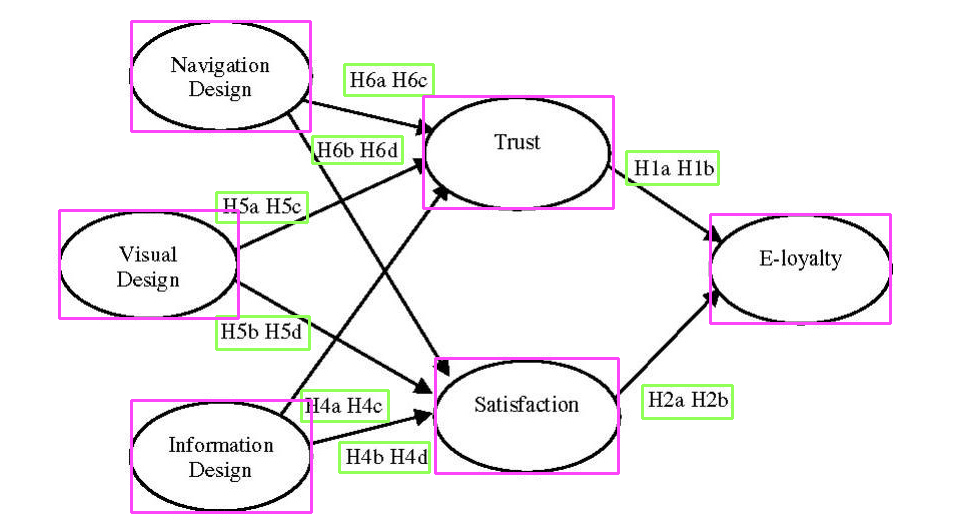

Processing image 0_Page13


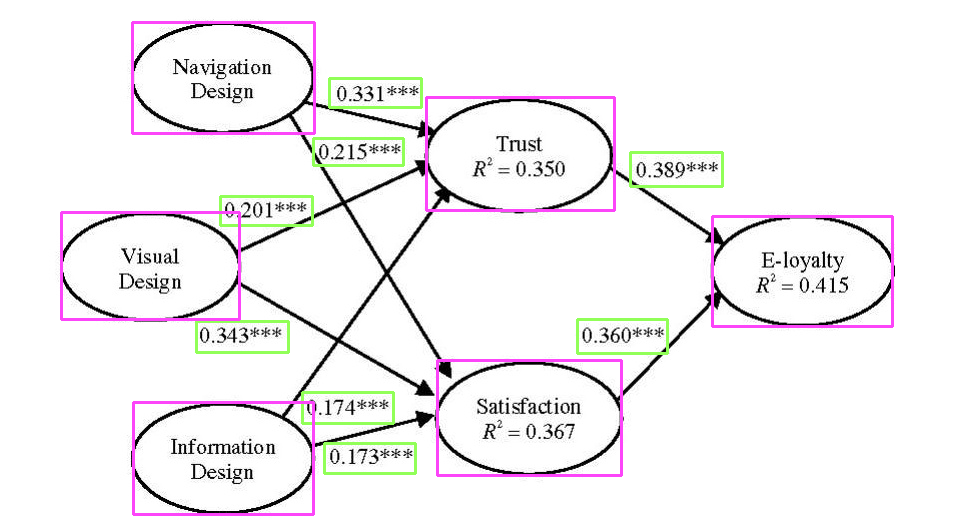

In [13]:
detect_variables(weights='var_det.weights')